# Final Project Submission

Please fill out:
* Student name: Anila Qureshi, Marwan Kalo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

## What data are we dealing with?

### Import Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns

### Import Dataset and Inspect

In [157]:
df = pd.read_csv('../dsc-mod-2-project-v2-1-london-ds-02172020/raw_data/kc_house_data.csv')
print(df.shape)
print(df.keys())
df.head()

(21597, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Cleaning Data

In [158]:
# Dropping null (NaN) values 
df = df.dropna()
print(df.shape)
df

(15762, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [159]:
# Dropping values containing '?' in sqft_basement column
df = df[df.sqft_basement != '?']
print(df.shape)
df

(15429, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [340]:
# Converting float values to integers for efficient future manipulation
df['price'] = (df['price']).astype(int)
df['floors'] = (df['floors']).astype(int)
df['sqft_basement'] = (df['sqft_basement']).astype(float).astype(int)
df['view'] = (df['view']).astype(int)
df['waterfront'] = (df['waterfront']).astype(int)

df.head()

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is tryin

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113


In [346]:
# Number of houses sold more than once - 83
df_duplicates = df[df.duplicated(['id'])]
df_duplicates.shape

(83, 21)

In [161]:
# Identifying the categorical features in our dataset and their unique values which we can then encode
print(np.sort(df['condition'].unique()))
print(np.sort(df['bedrooms'].unique()))
print(np.sort(df['bathrooms'].unique()))
print(np.sort(df['floors'].unique()))
print(np.sort(df['waterfront'].unique()))
print(np.sort(df['view'].unique()))
print(np.sort(df['grade'].unique()))

[1 2 3 4 5]
[ 1  2  3  4  5  6  7  8  9 10 11 33]
[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.75 7.5  7.75 8.  ]
[1 2 3]
[0 1]
[0 1 2 3 4]
[ 3  4  5  6  7  8  9 10 11 12 13]


In [162]:
# Assigning dummy variables to categorical features
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
floor_dummies = pd.get_dummies(df['floors'], prefix='floor', drop_first=True)
wtrfrnt_dummies = pd.get_dummies(df['waterfront'], prefix='wtrfrnt', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
bdrm_dummies = pd.get_dummies(df['bedrooms'], prefix='bdrm', drop_first=True)
bthrm_dummies = pd.get_dummies(df['bathrooms'], prefix='bthrm', drop_first=True)

In [163]:
# Creating a new dataframe to be used for the linear regression with dummy variables
df_dummy = df.drop(['condition', 'floors', 'waterfront', 'view', 'grade', 'bedrooms', 'bathrooms'], axis=1)

In [164]:
df_dummy = pd.concat([df_dummy, cond_dummies, floor_dummies, wtrfrnt_dummies, view_dummies, grade_dummies, bdrm_dummies, bthrm_dummies], axis=1)

In [165]:
df_dummy.head()

,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,bthrm_4.75,bthrm_5.0,bthrm_5.25,bthrm_5.5,bthrm_5.75,bthrm_6.0,bthrm_6.75,bthrm_7.5,bthrm_7.75,bthrm_8.0
1,6414100192,12/9/2014,538000,2570,7242,2170,400,1951,1991.0,98125,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000,1960,5000,1050,910,1965,0.0,98136,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000,1680,8080,1680,0,1987,0.0,98074,...,0,0,0,0,0,0,0,0,0,0
5,7237550310,5/12/2014,1230000,5420,101930,3890,1530,2001,0.0,98053,...,0,0,0,0,0,0,0,0,0,0
8,2414600126,4/15/2015,229500,1780,7470,1050,730,1960,0.0,98146,...,0,0,0,0,0,0,0,0,0,0


### Now that we have cleaned, let's check some descriptive statistics - How is the data distributed?

In [166]:
print("Median House Sale Price: $",df['price'].median())

Median House Sale Price: $ 450000.0


In [167]:
print("Mean House Sale Price: $",round(df['price'].mean(),2))

Mean House Sale Price: $ 541497.78


In [183]:
df['price'].describe()

count    1.542900e+04
mean     5.414978e+05
std      3.730219e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.435000e+05
max      7.700000e+06
Name: price, dtype: float64

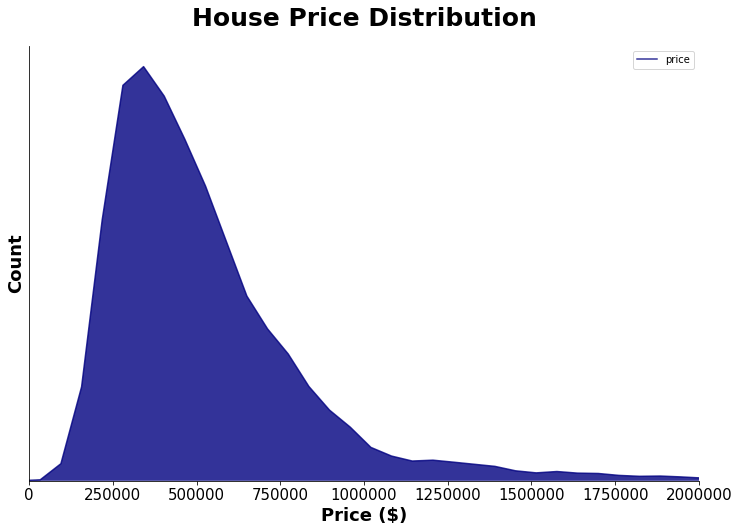

In [169]:
# How are house prices distributed in King County? How are they distributed geographically?
# A histogram showing distribution of price (capped at $2 mil for a more accurate visualisation)
fig, ax = plt.subplots(figsize=(12,8))

sns.kdeplot(df['price'], shade=True, color='navy',alpha=0.8)
sns.despine()

plt.yticks([])
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title('House Price Distribution', fontsize=25, loc='center', weight='bold', pad=20)
ax.set_xlabel('Price ($)', fontsize=18, weight='bold')
ax.set_ylabel('Count', fontsize=18, weight='bold')

plt.xlim(0,2000000)
plt.show()

In [170]:
# Preparing the data for a heatmap visualisation of house price sales across King County
# This will give us an overview of the distribution of price across the geography in question

price = df['price'].tolist()
latitude = df['lat'].tolist()
longitude = df['long'].tolist()

price_multiple = []
for x in price:
    price_multiple.append(x/100000)

In [171]:
price_multiple

[5.38,
 6.04,
 5.1,
 12.3,
 2.295,
 3.23,
 4.68,
 4.0,
 5.3,
 6.5,
 3.95,
 4.85,
 2.3,
 3.85,
 20.0,
 2.85,
 3.29,
 2.33,
 6.67,
 7.19,
 5.805,
 2.8,
 6.875,
 5.35,
 3.225,
 6.96,
 5.5,
 6.4,
 2.4,
 6.05,
 7.75,
 6.85,
 3.09,
 2.1049,
 7.85,
 4.5,
 13.5,
 2.28,
 3.45,
 5.85,
 9.2,
 3.01,
 4.3,
 2.89,
 5.49,
 4.25,
 3.17625,
 2.87,
 13.3,
 10.4,
 3.25,
 5.71,
 3.49,
 8.325,
 4.1,
 3.9,
 3.6,
 3.55,
 3.56,
 3.15,
 9.4,
 3.05,
 2.435,
 11.0,
 1.53,
 4.3,
 7.0,
 9.05,
 2.475,
 1.99,
 3.14,
 4.375,
 8.5083,
 5.55,
 6.9995,
 10.9,
 2.9,
 4.6,
 1.885,
 6.8,
 4.7,
 5.7,
 3.2995,
 5.185,
 2.05425,
 5.35,
 6.6,
 3.95,
 7.7,
 14.5,
 2.12,
 6.605,
 7.84,
 4.53246,
 6.75,
 2.2,
 3.825,
 6.65,
 2.05,
 5.0,
 9.215,
 8.9,
 4.3,
 2.58,
 5.11,
 5.3217,
 5.6,
 22.5,
 3.5,
 2.15,
 6.5,
 3.2,
 2.47,
 3.2,
 2.55,
 4.38,
 9.0,
 4.41,
 4.2,
 3.7,
 2.6995,
 8.071,
 6.53,
 2.84,
 9.175,
 6.73,
 4.25,
 3.9995,
 2.6995,
 2.6,
 4.7,
 1.635,
 8.35,
 11.0,
 2.69,
 5.85188,
 1.6695,
 7.99,
 4.0,
 2.3,
 2.56883,
 4.23

In [172]:
coords_and_weights = zip(latitude, longitude, price_multiple)

In [173]:
# An interactive sale price heatmap
heat_map = folium.Map([47.477993, -122.206452],
                     zoom_start = 11.5)
heat_map
HeatMap(coords_and_weights,radius=15).add_to(heat_map)
heat_map

## A closer look at our feature variables

### Distributions 

In [144]:
print(df.keys())
df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113


In [176]:
# Create a dataframe dropping certain features to then plot histograms showing distribution of features
df_dist = df.drop(['id','zipcode', 'lat', 'long'], axis=1)

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


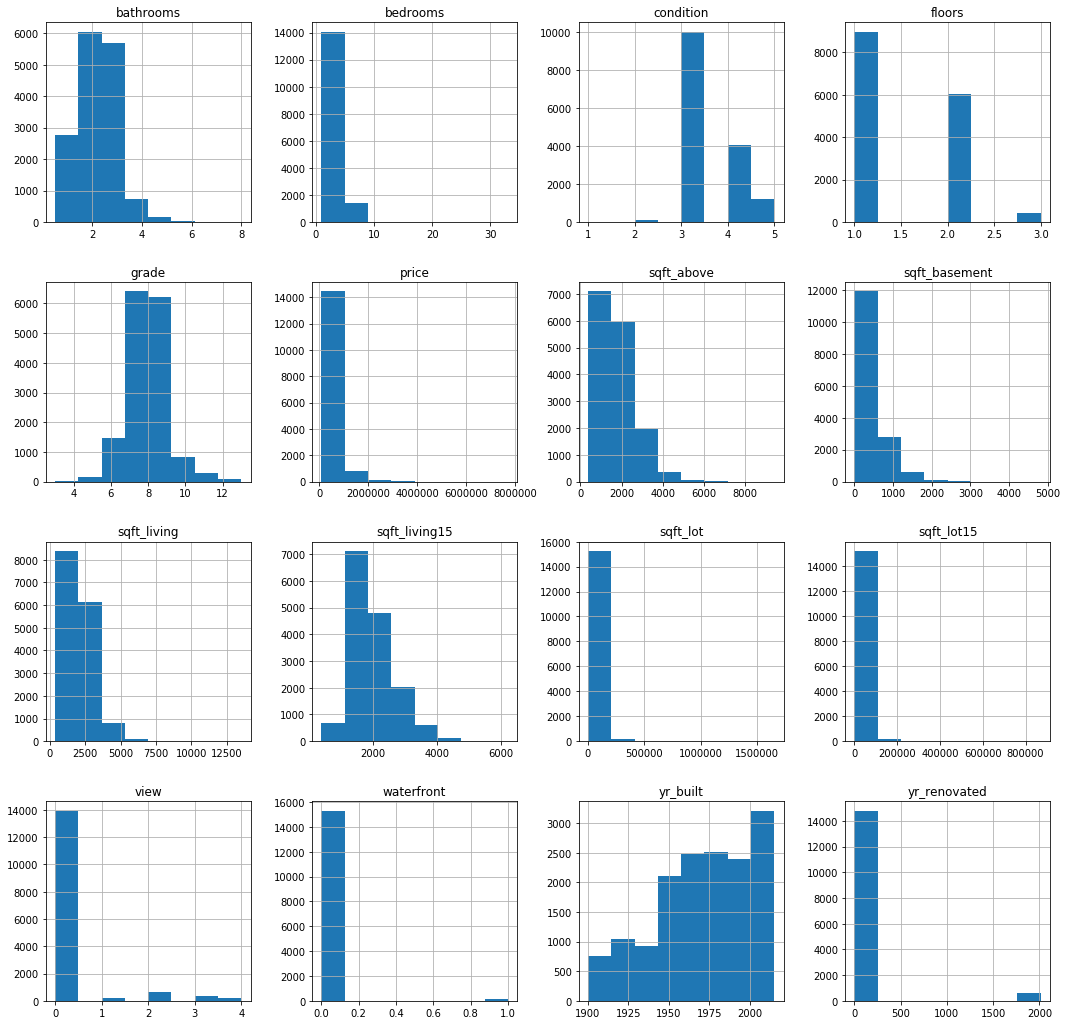

In [178]:
# Distribution of features
fig = plt.figure(figsize = (18,18))
ax = fig.gca()
df_dist.hist(ax = ax, bins=8)
plt.show()

In [182]:
# What were the top five zipcodes with the largest volume of sales within our data?
df.zipcode.value_counts().head()

98038    425
98103    415
98052    410
98042    408
98117    394
Name: zipcode, dtype: int64

### Multicollinearity

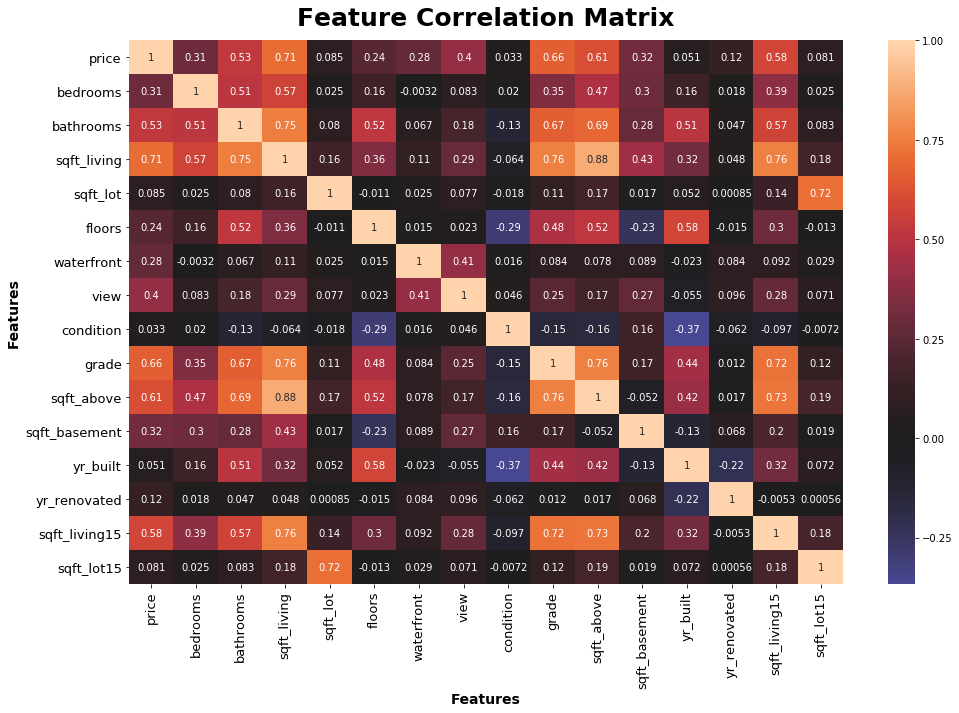

In [148]:
# Choosing features to check for multicollinearity 
df_multicoll = df.drop(['date','id','zipcode', 'lat', 'long'], axis=1)

fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_multicoll.corr(), center=0, annot=True)

ax.set_title('Feature Correlation Matrix', fontsize=25, loc='center', weight='bold', pad=15)
ax.set_xlabel('Features', fontsize=14, weight='bold')
ax.set_ylabel('Features', fontsize=14, weight='bold')
ax.tick_params(axis='both', which='major', labelsize=13)

plt.autoscale()
plt.show()

In [112]:
# # A boxplot showing the variance of the grade feature as it increases (heteroscedacity)


# var = 'grade'
# data = pd.concat([df['price'], df[var]], axis=1)

# f, ax = plt.subplots(figsize=(14, 10))
# fig = sns.boxplot(x=var, y = 'price', data=data, palette='dark')

# ax.set_title('Feature Variance: Grade', fontsize=25, loc='center', weight='bold', pad=10)
# ax.set_xlabel('Grade', fontsize=14, weight='bold')
# ax.set_ylabel('Price ($)', fontsize=14, weight='bold')
# ax.tick_params(axis='both', which='major', labelsize=13)

# sns.despine()
# fig.axis(ymin=0, ymax=8000000);

## Modelling the data

### Baseline Model

In [207]:
# Import the necessary software package
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression

In [154]:
df_dummy.head()

,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,bthrm_4.75,bthrm_5.0,bthrm_5.25,bthrm_5.5,bthrm_5.75,bthrm_6.0,bthrm_6.75,bthrm_7.5,bthrm_7.75,bthrm_8.0
1,6414100192,12/9/2014,538000,2570,7242,2170,400,1951,1991.0,98125,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000,1960,5000,1050,910,1965,0.0,98136,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000,1680,8080,1680,0,1987,0.0,98074,...,0,0,0,0,0,0,0,0,0,0
5,7237550310,5/12/2014,1230000,5420,101930,3890,1530,2001,0.0,98053,...,0,0,0,0,0,0,0,0,0,0
8,2414600126,4/15/2015,229500,1780,7470,1050,730,1960,0.0,98146,...,0,0,0,0,0,0,0,0,0,0


In [409]:
# X variables will contain our continuous and discrete features - we drop the dependent as well as non-predictors
X_base = df_dummy.drop(['id', 'date', 'price', 'zipcode', 'lat', 'long'], axis=1)

# Y variable is the dependent variable - what we want to predict
Y_base = df_dummy[['price']]

In [414]:
# Creating train test split (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_base,Y_base,test_size=.2, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12343, 66)
(3086, 66)
(12343, 1)
(3086, 1)


In [392]:
# Statsmodels OLS for training set
# Adding of constant to fit both the slope and intercept 
X_train_const = sm.add_constant(X_train)
base_training_model = sm.OLS(Y_train, X_train_const)

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [393]:
training_results = base_training_model.fit()

In [395]:
print("Training Data R-Squared:",round(training_results.rsquared,2))
training_results.summary()

Training Data R-Squared: 0.71


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     468.3
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:26:52   Log-Likelihood:            -1.6826e+05
No. Observations:               12343   AIC:                         3.366e+05
Df Residuals:                   12279   BIC:                         3.371e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.672e+06   3.03e+05     18.699      0.000    5.08e+06    6.27e+06
sqft_living      90.0897      3.138     28.709      0.000      83.939      96.241
sqft_lot          0.0073      0.060      0.121      0.903      -0.111       0.126
sqft_above       38.1128      3.140     12.138      0.000      31.958      44.268
sqft_basement    51.9768      3.495     14.872      0.000      45.126      58.828
yr_built      -2955.5631     95.621    -30.909      0.000   -3142.995   -2768.131
yr_renovated     22.4037      4.970      4.507      0.000      12.661      32.146
sqft_living15    41.7999      4.599      9.089      0.000      32.785      50.815
sqft_lot15       -0.5631      0.097     -5.826      0.000      -0.753      -0.374
cond_2        -2.767e+04   5.77e+04     -0.480      0.631   -1.41e+05    8.54e+04
cond_3        -1877.4462   5.46e+04     -0.034      0.973   -1.09e+05    1.05e+05
cond_4         1.395e+04   5.46e+04      0.256      0.798    -9.3e+04    1.21e+05
cond_5         6.011e+04   5.49e+04      1.096      0.273   -4.74e+04    1.68e+05
floor_2        2.416e+04   5982.578      4.039      0.000    1.24e+04    3.59e+04
floor_3        1.423e+05   1.26e+04     11.309      0.000    1.18e+05    1.67e+05
wtrfrnt_1      5.716e+05   2.63e+04     21.736      0.000     5.2e+05    6.23e+05
view_1         1.151e+05   1.46e+04      7.872      0.000    8.64e+04    1.44e+05
view_2         5.248e+04   9212.990      5.696      0.000    3.44e+04    7.05e+04
view_3          7.85e+04   1.28e+04      6.130      0.000    5.34e+04    1.04e+05
view_4         1.913e+05   1.92e+04      9.978      0.000    1.54e+05    2.29e+05
grade_4        3.426e+04   2.11e+05      0.163      0.871   -3.79e+05    4.47e+05
grade_5         1.89e+04   2.05e+05      0.092      0.927   -3.84e+05    4.21e+05
grade_6        7.855e+04   2.05e+05      0.383      0.702   -3.24e+05    4.81e+05
grade_7        1.699e+05   2.05e+05      0.828      0.408   -2.32e+05    5.72e+05
grade_8        2.599e+05   2.05e+05      1.266      0.206   -1.43e+05    6.62e+05
grade_9        3.929e+05   2.05e+05      1.913      0.056   -9780.990    7.96e+05
grade_10       5.488e+05   2.06e+05      2.669      0.008    1.46e+05    9.52e+05
grade_11       7.073e+05   2.06e+05      3.431      0.001    3.03e+05    1.11e+06
grade_12       1.262e+06   2.08e+05      6.072      0.000    8.55e+05    1.67e+06
grade_13       1.518e+06   2.19e+05      6.920      0.000    1.09e+06    1.95e+06
bdrm_2         1.989e+04   2.12e+04      0.936      0.349   -2.18e+04    6.15e+04
bdrm_3        -2.485e+04   2.13e+04     -1.169      0.242   -6.65e+04    1.68e+04
bdrm_4        -5.536e+04   2.17e+04     -2.554      0.011   -9.78e+04   -1.29e+04
bdrm_5        -5.863e+04   2.27e+04     -2.579      0.010   -1.03e+05   -1.41e+04
bdrm_6        -1.185e+05   2.75e+04     -4.305   

In [396]:
# SKLearn model for train and test
# Setting fit_intercept = True to fit the slope and intercept as we did in our OLS model
base_model_skl = LinearRegression(fit_intercept=True)

In [397]:
# Training model
base_model_skl.fit(X_train, Y_train);

In [398]:
# Training data model R-Squared result (same as above)
print("Training Data R-Squared:",round(base_model_skl.score(X_train, Y_train),2))

Training Data R-Squared: 0.71


In [399]:
# Test data model - lower than our training data model by 0.1 implying overfitting
print("Test Data R-Squared:",round(base_model_skl.score(X_test, Y_test),2))

Test Data R-Squared: 0.61


In [400]:
# Our baseline model, using all appropriate features, returned an R-Squared value of 0.71 on our training data
# and a 0.61 on our test data. Time to improve.

### Assessing and refining the model

In [401]:
# Based on the p-values in the summary table, we can see that many extraneous features exist
# therefore we want to select only the features whose p-values are less than 0.05.

In [402]:
# Discarding features with p-values less than 0.05
base_summary = training_results.summary()
base_p_table = base_summary.tables[1]
base_p_table = pd.DataFrame(base_p_table.data)
base_p_table.columns = base_p_table.iloc[0]
base_p_table = base_p_table.drop(0)
base_p_table = base_p_table.set_index(base_p_table.columns[0])

base_p_table['P>|t|'] = base_p_table['P>|t|'].astype(float)
x_cols = list(base_p_table[base_p_table['P>|t|'] < 0.05].index)
x_cols.remove('const')
print(len(base_p_table), len(x_cols))
print(x_cols)


67 33
['sqft_living', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'floor_2', 'floor_3', 'wtrfrnt_1', 'view_1', 'view_2', 'view_3', 'view_4', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'bdrm_4', 'bdrm_5', 'bdrm_6', 'bdrm_8', 'bthrm_3.75', 'bthrm_4.0', 'bthrm_4.25', 'bthrm_4.5', 'bthrm_4.75', 'bthrm_5.0', 'bthrm_5.25', 'bthrm_5.5', 'bthrm_6.0', 'bthrm_6.75', 'bthrm_8.0']


In [415]:
# Refit with subset features
X_train = X_train[x_cols]
Y_train = Y_train[['price']]
X_test = X_test[x_cols]
Y_test = Y_test[['price']]

In [418]:
X_train_const = sm.add_constant(X_train)
base_training_model = sm.OLS(Y_train, X_train_const)

In [421]:
results1 = base_training_model.fit()

In [425]:
round(results1.rsquared,2)

0.67

In [426]:
model_1_skl = LinearRegression(fit_intercept=True)

In [428]:
model_1_skl.fit(X_train, Y_train);

In [433]:
round(model_1_skl.score(X_train, Y_train),2)

0.67

In [434]:
round(model_1_skl.score(X_test, Y_test),2)

0.58